# DIT821 Software Engineering for AI systems - exam 2020-08-17


### Assignement: OneVsAll Classification

* Name, e-mail:

### Assignement description

You are provided with `Iris` dataset that contains 150 training examples and there are three classes, each representing a type of Iris plant (setoma, versicolour and virginica). There are four features in the Iris dataset (sepal length, sepal width, petal length and petal width)

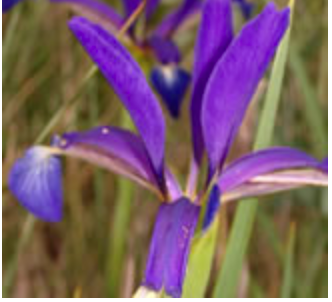

You are required to implement a one-vs-all regularized logistic regression classifier, one for each class $K=3$, to classify the type of Iris plant based on the four features.

Overview of the iris dataset:
- sepal length in cm
- sepal width in cm
- petal length in cm
- petal width in cm
- class: 
      - Iris Setosa : 0
      - Iris Versicolour: 1
      - Iris Virginica: 2

The next subsequent three cells implements code to import required libraries and load data. You are not required to make any changes.

In [26]:
# used for manipulating directory paths
import os

# Scientific and vector computation for python
import numpy as np

# Plotting library
import matplotlib.pyplot as plt

# Optimization module in scipy
from scipy import optimize

from sklearn.model_selection import train_test_split

# tells matplotlib to embed plots within the notebook
%matplotlib inline

In [27]:
# Load Iris data from sklearn.datasets
from sklearn.datasets import load_iris

X, y = load_iris(return_X_y = True)

# Number of clases = 3, mapped from 0 to 2
num_labels = 3

# Number of training examples
m = y.size

# We create a small test set (x_test, y_test) as a subset from dataset to use later for prediction
X, x_test, y, y_test = train_test_split(X, y, test_size = 0.05, random_state = 42) 

# Question 1

In the cells below, implement **OneVsAll regularized logistic regression classifier** by writing code for computing:
- `sigmoid function`
- `cost function` regularized logistic regression
- `gradient descent` regularized logistic regression

Before implementing these functions, first print the shape of features (X), target (y) and size of training examples. 

At the end, test your implementation using initialized weights `w` of zeros and `lambda_` value of 1.

In [28]:
# Print shape of X and y arrays
# ====================== YOUR CODE HERE ==================

print('Training set  (X,y): ',X.shape , y.shape)

# Print the number of training examples
# ====================== YOUR CODE HERE ==================

print('Test set  (x_test,y_test): ',x_test.shape , y_test.shape)


Training set  (X,y):  (142, 4) (142,)
Test set  (x_test,y_test):  (8, 4) (8,)


In [29]:
def sigmoid(z):
    """
    Compute sigmoid function given the input z
    """
    # Return correct value of g
    g = np.zeros(z.shape)
    
    # ====================== YOUR CODE HERE ======================
    e = np.exp(1)
    
    g = 1 / (1 + (e**(-1 *z)))


    # =============================================================
    return g

In [30]:
def costFunctionReg(w, X, y, lambda_):
    """
    Compute cost for regularized logistic regression. 
     
    """
    # Return correct value of cost function, J
    J = 0
    
    # convert labels to ints if their type is bool
    if y.dtype == bool:
        y = y.astype(int)
        
    # ====================== YOUR CODE HERE ======================
    z = np.dot(X,w)
    sigm = sigmoid(z)
    J = (np.sum((-1*np.dot(y,np.log(sigm))) + (-1*np.dot((1-y),np.log(1-sigm))))/m) + ((lambda_/(2*m))*np.sum(np.power(w[1:], 2)))
    
    # =============================================================
    return J

In [31]:
def gradientReg(w, X, y, lambda_):
    """
    Compute gradient for regularized logistic regression. 
    
    """

    # Return the following variable correctly 
    grad = np.zeros(w.shape)

    if y.dtype == bool:
        y = y.astype(int)
        
    # ====================== YOUR CODE HERE ======================
    
    z = np.dot(X,w)
    sigm = sigmoid(z)
    for j in range (grad.size):
        grad[j] = np.sum((sigm - y) * X[:, j]) / m 
        if j > 0: grad[j] +=(lambda_/m)*w[j]
    
    
    
    # =============================================================
    return grad

In [32]:
# Setup the data matrix appropriately, and add ones for the intercept term
m, n = X.shape

# Add intercept term to X
X = np.concatenate([np.ones((m, 1)), X], axis=1)

In [33]:
# Test your implementation by computing cost for initialized weights of zeros and lambda_= 1

# Set regularization parameter
lambda_ = 1

# Initialize fitting parameters
initial_w = np.zeros(n + 1)

cost = costFunctionReg(initial_w, X, y, lambda_)
grad = gradientReg(initial_w, X, y, lambda_)

print('Cost at initial w (zeros): {:.3f}'.format(cost))
print('Expected cost (approx): 0.693\n')

print('Gradient at initial w (zeros) - first five values only:')
print('\t[{:.4f}, {:.4f}, {:.4f}, {:.4f}, {:.4f}]'.format(*grad[:5]))


Cost at initial w (zeros): 0.693
Expected cost (approx): 0.693

Gradient at initial w (zeros) - first five values only:
	[-0.5000, -3.4419, -1.3799, -3.2475, -1.1951]


# Question 2

You will implement one-vs-all classification by training multiple regularized logistic regression classifiers, one for each of the  𝐾  classes in the dataset. While in dataset,𝐾=3, your code should work for any value of 𝐾 .

Complete the code for the function oneVsAll below, to train one classifier for each class. 

For this assignment, use `scipy.optimize.minimize`to optimize the cost function.  Its implementation is given below.

```python
    # The minimize helps to obtain the optimal w.  
    # From returned values, w is in `res.x` and cost in `res.fun`
        res = optimize.minimize(costFunctionReg, 
                                initial_w, 
                                (X, (y == c), lambda_), 
                                jac=gradientReg, 
                                method='TNC',
                                options={'maxiter':50}) 
 ```
 

In [36]:
def oneVsAll(X, y, num_labels, lambda_):
    """
    Trains num_labels logistic regression classifiers and returns
    each of these classifiers in a matrix all_w, where the i-th
    row of all_w corresponds to the classifier for label i.
    
    Example Code
    ------------
    
        # Set Initial w
        initial_w = np.zeros(n + 1)
      
        # Set options for minimize
        options = {'maxiter': 50}
    
        # Run minimize to obtain the optimal w. This function will 
        # return a class object where w is in `res.x` and cost in `res.fun`
        res = optimize.minimize(lrCostFunctionReg, 
                                initial_w, 
                                (X, (y == c), lambda_), 
                                jac=gradientReg, 
                                method='TNC',
                                options=options) 
    """
    # Some useful variables
    m, n = X.shape
    
    # You need to return the following variables correctly 
    all_w = np.zeros((num_labels, n + 1))

    # Add ones to the X data matrix
    X = np.concatenate([np.ones((m, 1)), X], axis=1)

    # ====================== YOUR CODE HERE ======================
    
    
    for i in range(num_labels):

        
        # Set Initial w
        initial_w = np.zeros(n + 1)
      
        # Set options for minimize
        options = {'maxiter': 50}

        # Run minimize to obtain the optimal w. This function will 
        # return a class object where w is in `res.x` and cost in `res.fun`
        res = optimize.minimize(costFunctionReg, 
                                initial_w, 
                                (X, (y == i), lambda_), 
                                jac=gradientReg, 
                                method='TNC',
                                options=options)
        
        all_w [i,:] = res.x;
    
    # ============================================================
    return all_w

After you have completed the code for `oneVsAll`, the following cell will use your implementation to train a multi-class classifier. 

In [37]:
lambda_ = 0.1
all_w = oneVsAll(X, y, num_labels, lambda_)

# Print the shape of all_w
print(all_w.shape)

# Print values of all_w
print(all_w)

(3, 6)
[[ 8.84566510e+00 -7.32285165e-02 -4.62000552e-01  1.50310474e+00
  -3.67282130e+00 -1.45648002e+00]
 [ 6.76800358e+00 -1.05453143e-01 -6.48088842e-02 -2.79937751e+00
   1.08709112e+00 -2.36903172e+00]
 [-1.96185438e+01  3.42235168e-03 -1.56525634e+00 -1.80228138e+00
   5.19714446e+00  5.45966190e+00]]


### Question 3

After training your one-vs-all classifier, use it for making predictions. Compute the “probability” that it belongs to each class using the trained logistic regression classifiers. 

Your one-vs-all prediction function will pick the class for which the corresponding logistic regression classifier outputs the highest probability and return the class label (0, 1, ..., K-1) as the prediction for the input example. 

Complete the code in the function `predictOneVsAll` to use the one-vs-all classifier for making predictions. 

In [38]:
def predictOneVsAll(all_w, X):
    """
    Return a vector of predictions for each example in the matrix X. 
    Note that X contains the examples in rows. all_w is a matrix where
    the i-th row is a trained logistic regression w vector for the 
    i-th class. You should set p to a vector of values from 0..K-1 
    (e.g., p = [0, 2, 0, 1] predicts classes 0, 2, 0, 1 for 4 examples) .
    
    """
    m = X.shape[0];
    num_labels = all_w.shape[0]

    # You need to return the following variables correctly 
    p = np.zeros(m)

    # Add ones to the X data matrix
    X = np.concatenate([np.ones((m, 1)), X], axis=1)

    # ====================== YOUR CODE HERE ======================
    
    e = np.exp(1)
    all_w = all_w.T
    pred = np.zeros(num_labels)
    pred = 1 / (1 + (e**(-1 *(np.dot(X,all_w)))))

    p = np.argmax(pred,axis=1)
    
    # ============================================================
    return p

In [39]:
# Compute and print accuracy on the training dataset
pred = predictOneVsAll(all_w, X)
print('Training Set Accuracy: {:.2f}%'.format(np.mean(pred == y) * 100))


Training Set Accuracy: 96.48%


In [40]:
## You are not required to make changes
# Add intercept term to test set data (x_test)
x_test = np.concatenate([np.ones((x_test.shape[0], 1)), x_test], axis=1)

In [41]:
# Predict classes on test set
preds = predictOneVsAll(all_w, x_test)
print('predictions: \n', preds)

# ============================================================

print('Actual values: \n', y_test)


predictions: 
 [1 0 2 1 1 0 1 2]
Actual values: 
 [1 0 2 1 1 0 1 2]


## Submit the solution

When you completed the excercise, download (form File menu) this file as a jupyter Notebook file (.ipynb) and uplaod this file in the CANVAS 

*By writing down my name I declare that I have done the assignements myself

* First Name  Last Name: